List of classifiers to use



1.   ~Decision Tree~
2.   Rule-based
3.   ~Nearest Neighbors (kNN)~
4.   ~Naive Bayes~
5.   ~Support Vector Machine (SVM)~
6.   ~Neural Networks~
7.   ~Random Forest~



IMPORT, CLEAN, AND SPLIT DATASET INTO BALANCED AND UNBLANCED TRAIN AND TEST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math

from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/Shareddrives/CSCI\ 5523\ -\ Data\ Mining\ Final\ Project
!ls

Mounted at /content/gdrive
/content/gdrive/Shareddrives/CSCI 5523 - Data Mining Final Project
 Balance_deprecated.ipynb   classification.ipynb   data
'Bot Detection.gslides'     cluster_2.ipynb	   data.ipynb
 botDetection.mp4	    cluster.ipynb	   Proposal.gdoc


In [ ]:


# import datasets
df_labels=pd.read_csv('data/midterm-2018.tsv', sep='\t')
df_labels=df_labels.rename(columns={'2521260264':'user_id'})

df_users=pd.read_json('data/midterm-2018_processed_user_objects.json')

# Merge our user objects and labels.
df=pd.merge(df_users, df_labels, on=['user_id'])

# Look at the shape and information
print(df.shape)
print(df.info())

# check bot vs human counts
print(df['bot'].value_counts())

# create unbalanced train and test dataframes
train_u, test_u = train_test_split(df, test_size=0.2)

# equal datatypes check
if all(train_u.dtypes == test_u.dtypes):
  print("pass: data types are all same between train and test")
else:
  print('\nFAIL: DATA TYPES ARE NOT EQUAL BETWEEN TRAIN AND TEST, SOMETHING IS WRONG\n')


# create balanced train and test datframes
bots=df[df['bot']=='bot']
humans=df[df['bot']=='human']
bots_sample=bots.sample(8092)
bal_df=bots_sample.append(humans)

train_b, test_b = train_test_split(bal_df, test_size=0.2)

# equal datatypes check
if all(train_b.dtypes == test_b.dtypes):
  print("pass: data types are all same between train and test")
else:
  print('\nFAIL: DATA TYPES ARE NOT EQUAL BETWEEN TRAIN AND TEST, SOMETHING IS WRONG\n')





# # clean dataframes
# cols_to_drop = ['probe_timestamp', 'user_id', 'screen_name', 'name', 'description', 'user_created_at', 'url', 'lang', 'protected', 'tid']

for dataframe in dataframes:
  dataframe.drop(labels=cols_to_drop, axis=1, inplace=True)                 # drop unused columns
  dataframe['bot'] = [1 if val=='bot' else 0 for val in dataframe['bot']]   # convert bot column from string to int (1 for bot, 0 for human)

dataframe.info()

In [ ]:
import numpy as np

In [ ]:
train_u = pd.read_json('data/more_human_train.json')

In [ ]:
test_u = pd.read_json('data/more_human_test.json')

In [ ]:
train_b = pd.read_json('data/bal_train.json')

In [ ]:
test_b = pd.read_json('data/bal_test.json')

In [ ]:
dataframes = [train_u, test_u, train_b, test_b]

for dataframe in dataframes:
  dataframe['bot'] = [1 if val=='bot' else 0 for val in dataframe['bot']]   # convert bot column from string to int (1 for bot, 0 for human)

In [ ]:
train_u[train_u['bot']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 32826 to 30371
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      1330 non-null   bool 
 1   geo_enabled                   1330 non-null   bool 
 2   profile_use_background_image  1330 non-null   bool 
 3   default_profile               1330 non-null   bool 
 4   followers_count               1330 non-null   int64
 5   friends_count                 1330 non-null   int64
 6   listed_count                  1330 non-null   int64
 7   favourites_count              1330 non-null   int64
 8   statuses_count                1330 non-null   int64
 9   bot                           1330 non-null   int64
dtypes: bool(4), int64(6)
memory usage: 77.9 KB


In [ ]:
test_u[test_u['bot']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 28149 to 9122
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      327 non-null    bool 
 1   geo_enabled                   327 non-null    bool 
 2   profile_use_background_image  327 non-null    bool 
 3   default_profile               327 non-null    bool 
 4   followers_count               327 non-null    int64
 5   friends_count                 327 non-null    int64
 6   listed_count                  327 non-null    int64
 7   favourites_count              327 non-null    int64
 8   statuses_count                327 non-null    int64
 9   bot                           327 non-null    int64
dtypes: bool(4), int64(6)
memory usage: 19.2 KB


In [ ]:
test_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10108 entries, 15916 to 32606
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      10108 non-null  bool 
 1   geo_enabled                   10108 non-null  bool 
 2   profile_use_background_image  10108 non-null  bool 
 3   default_profile               10108 non-null  bool 
 4   followers_count               10108 non-null  int64
 5   friends_count                 10108 non-null  int64
 6   listed_count                  10108 non-null  int64
 7   favourites_count              10108 non-null  int64
 8   statuses_count                10108 non-null  int64
 9   bot                           10108 non-null  int64
dtypes: bool(4), int64(6)
memory usage: 592.3 KB


In [ ]:
train_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40429 entries, 3637 to 32897
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      40429 non-null  bool 
 1   geo_enabled                   40429 non-null  bool 
 2   profile_use_background_image  40429 non-null  bool 
 3   default_profile               40429 non-null  bool 
 4   followers_count               40429 non-null  int64
 5   friends_count                 40429 non-null  int64
 6   listed_count                  40429 non-null  int64
 7   favourites_count              40429 non-null  int64
 8   statuses_count                40429 non-null  int64
 9   bot                           40429 non-null  int64
dtypes: bool(4), int64(6)
memory usage: 2.3 MB


In [ ]:
test_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237 entries, 5928 to 20871
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      3237 non-null   bool 
 1   geo_enabled                   3237 non-null   bool 
 2   profile_use_background_image  3237 non-null   bool 
 3   default_profile               3237 non-null   bool 
 4   followers_count               3237 non-null   int64
 5   friends_count                 3237 non-null   int64
 6   listed_count                  3237 non-null   int64
 7   favourites_count              3237 non-null   int64
 8   statuses_count                3237 non-null   int64
 9   bot                           3237 non-null   int64
dtypes: bool(4), int64(6)
memory usage: 189.7 KB


In [ ]:
train_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12947 entries, 7227 to 18506
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   verified                      12947 non-null  bool 
 1   geo_enabled                   12947 non-null  bool 
 2   profile_use_background_image  12947 non-null  bool 
 3   default_profile               12947 non-null  bool 
 4   followers_count               12947 non-null  int64
 5   friends_count                 12947 non-null  int64
 6   listed_count                  12947 non-null  int64
 7   favourites_count              12947 non-null  int64
 8   statuses_count                12947 non-null  int64
 9   bot                           12947 non-null  int64
dtypes: bool(4), int64(6)
memory usage: 758.6 KB


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_analysis(test, predictions, label):
  print("-----------------------------------")
  print('{} Accuracy score: {}'.format(label, accuracy_score(test, predictions)))
  print('{} Precision score: {}'.format(label, precision_score(test, predictions)))
  print('{} Recall score: {}'.format(label, recall_score(test, predictions)))
  print('{} F1 score: {}'.format(label, f1_score(test, predictions)))
  print("-----------------------------------\n")

CREATE TRAIN AND TEST FOR BALANCED AND UNBALANCED

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# UNBALANCED
x_train_u = train_u.to_numpy()[:,:-1].astype(int)   # all cols of train_u except for class label
x_train_u_scaled = scaler.fit_transform(x_train_u)

y_train_u = train_u.to_numpy()[:,-1].astype(int)    # only class label (last) column of train_u

x_test_u = test_u.to_numpy()[:,:-1].astype(int)   # all cols of test_u except for class label
x_test_u_scaled = scaler.transform(x_test_u)

y_test_u = test_u.to_numpy()[:,-1].astype(int)    # only class label (last) column of test_u

# BALANCED
x_train_b = train_b.to_numpy()[:,:-1].astype(int)   # all cols of train_b except for class label
x_train_b_scaled = scaler.fit_transform(x_train_b)

y_train_b = train_b.to_numpy()[:,-1].astype(int)    # only class label (last) column of train_b

x_test_b = test_b.to_numpy()[:,:-1].astype(int)   # all cols of test_b except for class label
x_test_b_scaled = scaler.transform(x_test_b)

y_test_b = test_b.to_numpy()[:,-1].astype(int)    # only class label (last) column of test_b

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# UNBALANCED
print('decision tree unbalanced')
tree_u = DecisionTreeClassifier(random_state=17)
tree_u.fit(x_train_u, y_train_u)
tree_pred = tree_u.predict(x_test_u)
print_analysis(y_test_u, tree_pred, 'tree')

# BALANCED
print('decision tree balanced')
tree_b = DecisionTreeClassifier(random_state=17)
tree_b.fit(x_train_b, y_train_b)
tree_pred = tree_u.predict(x_test_b)
print_analysis(y_test_b, tree_pred, 'tree')


decision tree unbalanced
-----------------------------------
tree Accuracy score: 0.9543589743589743
tree Precision score: 0.8562874251497006
tree Recall score: 0.8746177370030581
tree F1 score: 0.8653555219364599
-----------------------------------

decision tree balanced
-----------------------------------
tree Accuracy score: 0.9227679950571517
tree Precision score: 0.990909090909091
tree Recall score: 0.8567110036275696
tree F1 score: 0.9189364461738003
-----------------------------------



In [ ]:
print(tree_b.tree_.max_depth)

21


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# UNBALANCED
print('random forest unbalanced')
forest_u = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest_u.fit(x_train_u, y_train_u)
forest_pred = forest_u.predict(x_test_u)
print_analysis(y_test_u, forest_pred, 'random forest')

# BALANCED
print('random forest balanced')
forest_b = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest_b.fit(x_train_b, y_train_b)
forest_pred = forest_b.predict(x_test_b)
print_analysis(y_test_b, forest_pred, 'random forest')

random forest unbalanced
-----------------------------------
random forest Accuracy score: 0.9697435897435898
random forest Precision score: 0.932258064516129
random forest Recall score: 0.8837920489296636
random forest F1 score: 0.9073783359497646
-----------------------------------

random forest balanced
-----------------------------------
random forest Accuracy score: 0.9586036453506332
random forest Precision score: 0.9567307692307693
random forest Recall score: 0.9625151148730351
random forest F1 score: 0.9596142254370102
-----------------------------------



K NEAREST NEIGHBORS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = 5

# UNBALANCED
print('knn unbalanced')
knn_u = KNeighborsClassifier(n_neighbors=num_neighbors)
# knn_u.fit(x_train_u_scaled, y_train_u)
knn_u.fit(x_train_u, y_train_u)
# knn_pred = knn_u.predict(x_test_u_scaled)
knn_pred = knn_u.predict(x_test_u)
print_analysis(y_test_u, knn_pred, 'knn')


# BALANCED
print('knn balanced')
knn_b = KNeighborsClassifier(n_neighbors=num_neighbors)
# knn_b.fit(x_train_b_scaled, y_train_b)
knn_b.fit(x_train_b, y_train_b)
# knn_pred = knn_u.predict(x_test_b_scaled)
knn_pred = knn_b.predict(x_test_b)
print_analysis(y_test_b, knn_pred, 'knn')

knn unbalanced
-----------------------------------
knn Accuracy score: 0.961025641025641
knn Precision score: 0.8768768768768769
knn Recall score: 0.8929663608562691
knn F1 score: 0.8848484848484849
-----------------------------------

knn balanced
-----------------------------------
knn Accuracy score: 0.9437751004016064
knn Precision score: 0.9360189573459715
knn Recall score: 0.9552599758162031
knn F1 score: 0.9455415918611609
-----------------------------------



NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# UNBALANCED
print('naive bayes unbalanced')
naive_bayes_u = MultinomialNB()
naive_bayes_u.fit(x_train_u, y_train_u)
nb_pred = naive_bayes_u.predict(x_test_u)
print_analysis(y_test_u, nb_pred, 'naive bayes')

# BALANCED
print('naive bayes balanced')
naive_bayes_b = MultinomialNB()
naive_bayes_b.fit(x_train_b, y_train_b)
nb_pred = naive_bayes_b.predict(x_test_b)
print_analysis(y_test_b, nb_pred, 'naive bayes')

naive bayes unbalanced
-----------------------------------
naive bayes Accuracy score: 0.35846153846153844
naive bayes Precision score: 0.20535714285714285
naive bayes Recall score: 0.9847094801223242
naive bayes F1 score: 0.3398416886543536
-----------------------------------

naive bayes balanced
-----------------------------------
naive bayes Accuracy score: 0.5752239728143342
naive bayes Precision score: 0.5465465465465466
naive bayes Recall score: 0.9903264812575574
naive bayes F1 score: 0.7043646527628468
-----------------------------------



SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm

# UNBALANCED
print('svm unbalanced')
svm_u = svm.SVC()
svm_u.fit(x_train_u, y_train_u)
svm_pred = svm_u.predict(x_test_u)
print_analysis(y_test_u, svm_pred, 'svm')

# BALANCED
print('svm balanced')
svm_b = svm.SVC()
svm_b.fit(x_train_b, y_train_b)
svm_pred = svm_b.predict(x_test_b)
print_analysis(y_test_b, svm_pred, 'svm')

svm unbalanced
-----------------------------------
svm Accuracy score: 0.8323076923076923
svm Precision score: 0.0
svm Recall score: 0.0
svm F1 score: 0.0
-----------------------------------

svm balanced


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------
svm Accuracy score: 0.771393265369169
svm Precision score: 0.6913735343383585
svm Recall score: 0.998186215235792
svm F1 score: 0.8169223156853044
-----------------------------------



NEURAL NETWORK

In [ ]:
from matplotlib import pyplot as plt

def plot_history(history):
  
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

neural net unbalanced
Epoch 1/10
208/208 [==============================] - 1s 3ms/step - loss: 343.7496 - accuracy: 0.7560 - val_loss: 2.6803 - val_accuracy: 0.9282
Epoch 2/10
208/208 [==============================] - 0s 2ms/step - loss: 2.4751 - accuracy: 0.9228 - val_loss: 0.7548 - val_accuracy: 0.9325
Epoch 3/10
208/208 [==============================] - 0s 2ms/step - loss: 2.3583 - accuracy: 0.9335 - val_loss: 1.0491 - val_accuracy: 0.9299
Epoch 4/10
208/208 [==============================] - 0s 2ms/step - loss: 2.1233 - accuracy: 0.9418 - val_loss: 1.0409 - val_accuracy: 0.9444
Epoch 5/10
208/208 [==============================] - 0s 2ms/step - loss: 1.2730 - accuracy: 0.9409 - val_loss: 1.2163 - val_accuracy: 0.9556
Epoch 6/10
208/208 [==============================] - 0s 2ms/step - loss: 1.8811 - accuracy: 0.9511 - val_loss: 0.6662 - val_accuracy: 0.9436
Epoch 7/10
208/208 [==============================] - 0s 2ms/step - loss: 0.7835 - accuracy: 0.9459 - val_loss: 0.4319 - val

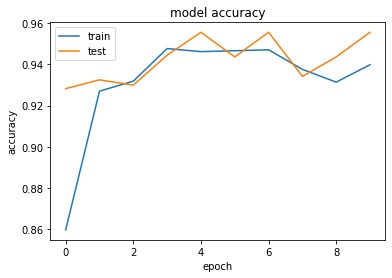

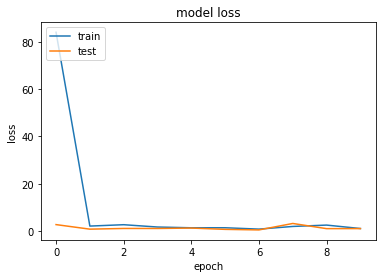

-----------------------------------
neural net Accuracy score: 0.9548717948717949
neural net Precision score: 0.9442379182156134
neural net Recall score: 0.7767584097859327
neural net F1 score: 0.8523489932885907
-----------------------------------

neural net balanced
Epoch 1/10
344/344 [==============================] - 1s 2ms/step - loss: 4.4328 - accuracy: 0.9130 - val_loss: 1.6087 - val_accuracy: 0.9243
Epoch 2/10
344/344 [==============================] - 1s 1ms/step - loss: 8.9299 - accuracy: 0.8980 - val_loss: 3.1771 - val_accuracy: 0.9110
Epoch 3/10
344/344 [==============================] - 1s 2ms/step - loss: 4.3175 - accuracy: 0.9222 - val_loss: 4.2877 - val_accuracy: 0.9264
Epoch 4/10
344/344 [==============================] - 1s 2ms/step - loss: 3.6924 - accuracy: 0.9316 - val_loss: 4.5374 - val_accuracy: 0.9238
Epoch 5/10
344/344 [==============================] - 1s 2ms/step - loss: 2.8231 - accuracy: 0.9249 - val_loss: 2.2403 - val_accuracy: 0.9279
Epoch 6/10
344/344 [

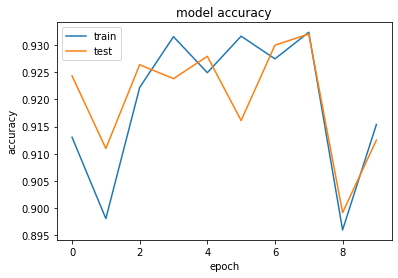

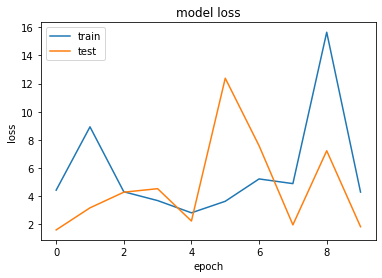

-----------------------------------
neural net Accuracy score: 0.9094840902069817
neural net Precision score: 0.874931129476584
neural net Recall score: 0.9600967351874244
neural net F1 score: 0.9155376189103488
-----------------------------------



In [ ]:
import tensorflow as tf
import numpy as np

num_epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train_u.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# UNBALANCED
print('neural net unbalanced')

history_u = model.fit(x_train_u, y_train_u, epochs=num_epochs, validation_split=0.15)
plot_history(history_u)

probability_model_u = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model_u.predict(x_test_u)
predictions = [np.argmax(pred) for pred in predictions]
print_analysis(y_test_u, predictions, 'neural net')


# BALANCED
print('neural net balanced')

history_b = model.fit(x_train_b, y_train_b, epochs=num_epochs, validation_split=0.15)
plot_history(history_b)

probability_model_b = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model_b.predict(x_test_b)
predictions = [np.argmax(pred) for pred in predictions]
print_analysis(y_test_b, predictions, 'neural net')
